In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import scipy as sp
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

pd.set_option("display.max_columns", 100)

import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats

In [65]:
# Basic Dummified Dataset for Linear Models
base = pd.read_csv('../../Data/BaseData.csv')
base.shape

(2580, 299)

### MLR With SFS (n=2) ###

In [66]:
from sklearn.feature_selection import SequentialFeatureSelector

In [67]:
y=base.SalePrice
X=base.drop('SalePrice', axis=1)

In [68]:
multiple = LinearRegression()

In [69]:
sfs_foreward = SequentialFeatureSelector(
    multiple, n_features_to_select=2, direction="forward"
).fit(X, y)

In [70]:
selected = X.columns[sfs_foreward.get_support()]
selected

Index(['GrLivArea', 'OverallQual'], dtype='object')

In [71]:
X = base[selected]
X.head(3)

,GrLivArea,OverallQual
0,856,6
1,1049,5
2,1001,5


In [72]:
multiple.fit(X,y)

LinearRegression()

In [73]:
multiple.score(X,y)

0.7369669374053521

In [74]:
multiple.coef_

array([   62.03992318, 30958.43366053])

In [75]:
X = base[selected]
y = base.SalePrice.values.reshape(-1,1)

In [76]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'}

In [77]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [78]:
MLR2 = evaluate_model(multiple, X,y)
MLR2

,fit_time,score_time,test_r2,test_neg_mae
0,0.001899,0.000848,0.721532,-28164.878506
1,0.002329,0.000858,0.714287,-27049.224160
2,0.003041,0.000832,0.736684,-27698.322385
3,0.001688,0.000786,0.755845,-26511.236741
4,0.001658,0.000771,0.751330,-27340.893252
5,0.002649,0.000836,0.724462,-28806.026900
6,0.002155,0.000848,0.782182,-24750.067055
7,0.002213,0.000812,0.724543,-27617.820371
8,0.003349,0.000917,0.747638,-26896.146585
9,0.001840,0.000844,0.708893,-28626.371665


In [79]:
MLR2 = MLR2.assign(MAE = MLR2['test_neg_mae'].abs())
MLR2 = MLR2.rename(columns = {'test_r2':'MLR Area+Qual', 'MAE':'MLR MAE Area+Qual'})
MLR2

,fit_time,score_time,MLR Area+Qual,test_neg_mae,MLR MAE Area+Qual
0,0.001899,0.000848,0.721532,-28164.878506,28164.878506
1,0.002329,0.000858,0.714287,-27049.224160,27049.224160
2,0.003041,0.000832,0.736684,-27698.322385,27698.322385
3,0.001688,0.000786,0.755845,-26511.236741,26511.236741
4,0.001658,0.000771,0.751330,-27340.893252,27340.893252
5,0.002649,0.000836,0.724462,-28806.026900,28806.026900
6,0.002155,0.000848,0.782182,-24750.067055,24750.067055
7,0.002213,0.000812,0.724543,-27617.820371,27617.820371
8,0.003349,0.000917,0.747638,-26896.146585,26896.146585
9,0.001840,0.000844,0.708893,-28626.371665,28626.371665


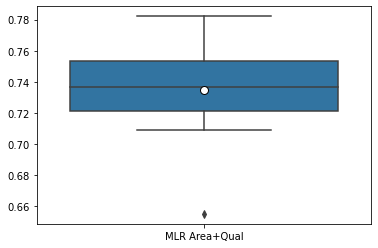

In [80]:
sns.boxplot(data=MLR2[['MLR Area+Qual']], showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});

In [81]:
MLR2.describe()

,fit_time,score_time,MLR Area+Qual,test_neg_mae,MLR MAE Area+Qual
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.002483,0.000936,0.734588,-27377.157892,27377.157892
std,0.000914,0.000325,0.030715,1402.282462,1402.282462
min,0.001658,0.000771,0.654818,-30425.541337,24750.067055
25%,0.001934,0.000834,0.720893,-28253.899529,26461.505536
50%,0.002213,0.000848,0.736684,-27340.893252,27340.893252
75%,0.002668,0.000880,0.753587,-26461.505536,28253.899529
max,0.005280,0.002097,0.782182,-24750.067055,30425.541337


In [82]:
MLR2.to_csv('MLR2.csv', index=False)

In [63]:
simple.fit(X,y)
response = simple.predict(X)
r2 = simple.score(X,y)

NameError: name 'simple' is not defined

In [ ]:
r2

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='blue', label='R-Squared of 0.625')
ax.scatter(X, y, edgecolor='k', facecolor='white', alpha=0.8, label='Data')
ax.set_ylabel('House Sale Price (US$)', fontsize=14)
ax.set_xlabel('Overall Quality', fontsize=14)
#ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Simple Linear Regression (Overall Quality vs Price)', fontsize = 18, color='blue')
#ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()